<a href="https://colab.research.google.com/github/ravi-gopalan/DAND_Data_Wrangling/blob/master/scrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install chromium, its driver, and selenium
!apt install chromium-chromedriver
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

import time
import pandas as pd
import matplotlib.pyplot as plt
import re

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
driver = webdriver.Chrome('chromedriver',options=options)



Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension adobe-flashplugin
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra
0 upgraded, 4 newly installed, 0 to remove and 35 not upgraded.
Need to get 71.9 MB of archives.
After this operation, 257 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-codecs-ffmpeg-extra amd64 78.0.3904.70-0ubuntu0.18.04.2 [1,078 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser amd64 78.0.3904.70-0ubuntu0.18.04.2 [63.3 MB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser-l10n all 78.0.390

In [10]:
url = 'https://play.google.com/store/apps/details?id=com.abvmobile&showAllReviews=true'

y = 200
for i in range(0,200):
  driver.execute_script("window.scrollTo(0,"+str(y)+")")
  y += 1000
  time.sleep(2)
driver.get(url)
driver.title





'abillionveg - Vegan food & cruelty-free products - Apps on Google Play'

In [0]:
# Selenium script to scroll to the bottom, wait 3 seconds for the next batch of data to load, then continue scrolling.  
# It will continue to do this until the page stops loading new data.
url = 'https://play.google.com/store/apps/details?id=com.abvmobile&showAllReviews=true'
driver.get(url)
lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight); var lenOfPage=document.body.scrollHeight; return lenOfPage;")
match=False
while(match==False):
  lastCount = lenOfPage
  time.sleep(3)
  lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
  if lastCount==lenOfPage:
    match=True

In [3]:
lenOfPage

23933

In [4]:
driver.current_url

'https://play.google.com/store/apps/details?id=com.abvmobile&showAllReviews=true'

17

In [5]:
bu = driver.find_elements_by_css_selector('button.LkLjZd.ScJHi.OzU4dc')

len(bu)

17

In [6]:
for item in bu:
  time.sleep(1)
  item.click()
  time.sleep(1)

ElementClickInterceptedException: ignored

In [7]:
driver.current_url

'https://play.google.com/store/apps/details?id=com.abvmobile&showAllReviews=true'

In [54]:
driver.find_element_by_xpath("//div[@button='U26fgb.O0WRkf.oG5Srb.C0oVfc.n9lfJ.M9Bg4d']")
#driver.find_element_by_xpath("//span[@jsname='bN97Pc']").text

NoSuchElementException: ignored

In [55]:
driver.find_elements_by_link_text('Full Review')
#(By.XPATH, '//button[text()="Read All Reviews"]')

[]

In [69]:
for item in driver.find_elements(By.XPATH, '//button[text()="Full Review"]'):
  print(item.text)

Full Review
Full Review
Full Review
Full Review
Full Review
Full Review
Full Review
Full Review
Full Review
Full Review
Full Review


In [8]:
for item in driver.find_elements(By.XPATH, '//button[text()="Full Review"]'):
  item.click()
  time.sleep(1)

ElementClickInterceptedException: ignored

[<selenium.webdriver.remote.webelement.WebElement (session="ae10500c3b3b53c7bac3f5bcff1a106e", element="76c03bc2-8ecc-4481-a9b9-57b092b5120a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ae10500c3b3b53c7bac3f5bcff1a106e", element="a7be3c4e-3fe4-4f45-9afa-63fb83cfb346")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ae10500c3b3b53c7bac3f5bcff1a106e", element="c972dc2b-c863-43e9-8f91-5abb8e76f33e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ae10500c3b3b53c7bac3f5bcff1a106e", element="5959de5d-46a1-4641-b02e-9fc58d964be2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ae10500c3b3b53c7bac3f5bcff1a106e", element="8141a1b1-380a-42ae-a9b3-40de8be36a76")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ae10500c3b3b53c7bac3f5bcff1a106e", element="d7ec374f-6ae6-410f-9a32-f6fe9f40b214")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ae10500c3b3b53c7bac3f5bcff1a106e", element="9e56b688-f3e8-43b4-91e2-9f

In [7]:
full_reviews  = driver.find_elements(by='xpath',value="//span[@jsname='fbQN7e']")
print(full_reviews)
for review in full_reviews:
        for paragraph in review.find_elements(By.TAG_NAME, 'span'):
            print(paragraph.get_attribute('textContent').encode("utf-8"))
        print('\n============================\n')

[<selenium.webdriver.remote.webelement.WebElement (session="56ee0aef89f58122d1f4ea94b8c1b4e5", element="b0a3e216-285d-4e0f-ba97-3130abfbcf8d")>, <selenium.webdriver.remote.webelement.WebElement (session="56ee0aef89f58122d1f4ea94b8c1b4e5", element="fe9b60ee-b1a5-46c1-9e1b-7bbcfd4292eb")>, <selenium.webdriver.remote.webelement.WebElement (session="56ee0aef89f58122d1f4ea94b8c1b4e5", element="46abb7ef-ec36-4d72-848b-90fd34c02669")>, <selenium.webdriver.remote.webelement.WebElement (session="56ee0aef89f58122d1f4ea94b8c1b4e5", element="d8233220-c3d9-4fd0-bcde-1d7491d486da")>]










In [11]:
full_reviews[0].find_elements(By.TAG_NAME, 'p')

[]

In [72]:

driver.find_element_by_xpath("//span[@jsname='bN97Pc']").text

"Loving the concept of this app. Even without the donations it's still a great idea. However that is a major incentive. What that said almost everything works pretty well however when you take a photo it comes out sideways and that's aggravating cuz you can't rotate it or anything. But other than tha...\nFull Review"

In [102]:
driver.find_element_by_xpath("//span[@class='p2TkOb']").text

'October 25, 2019'

In [105]:

driver.find_element_by_xpath("//input[@role='button' and @class='U26fgb O0WRkf oG5Srb C0oVfc n9lfJ M9Bg4d' and @jsaction='click:cOuCgd; mousedown:UX7yZ; mouseup:lbsD7e; mouseenter:tfO1Yc; mouseleave:JywGue; focus:AHmuwe; blur:O22p3e; contextmenu:mg9Pef;touchstart:p6p2H; touchmove:FwuNnf; touchend:yfqBxc(preventMouseEvents=true|preventDefault=true); touchcancel:JMtRjd;' and @jscontroller='VXdfxd']").click()

time.sleep(3)



NoSuchElementException: ignored

In [9]:
reviewer = []
review_date = []
i = 0

review_info = {}
for item in driver.find_elements_by_css_selector('div.bAhLNe.kx8XBd'):
  reviewer.append(item.text)

helpful_reviews = driver.find_elements_by_css_selector('div.jUL89d.y92BAb')
abridged_review = driver.find_elements(by='xpath',value="//span[@jsname='bN97Pc']")
full_reviews  = driver.find_elements(by='xpath',value="//span[@jsname='fbQN7e']")
stars = driver.find_elements(by='xpath',value="//span[@class='nt2C1d']//div//div[@role='img']")
print(len(reviewer),len(abridged_review), len(full_reviews), len(helpful_reviews),len(stars))

92 92 92 92 92


In [0]:

all_reviews = []
for i, (r, a, f, h, s) in enumerate(zip(reviewer, abridged_review,full_reviews, helpful_reviews, stars )):
  review_info = {}
  review_info.update({'id':i, \
                      'name':r.split('\n')[0], \
                      'review_date':r.split('\n')[1], \
                      'abridged_review': a.text, \
                      'full_review': f.text, \
                      'helpful_review': h.text, \
                      'stars':re.findall(r"\d",s.get_attribute('aria-label'))[0]})
  all_reviews.append(review_info)


In [29]:
df_review = pd.DataFrame(all_reviews)
df_review.info()
df_review['review_date'] = df_review['review_date'].apply(lambda x: pd.datetime.strptime(x, '%B %d, %Y'))
df_review['helpful_review'] = pd.to_numeric(df_review['helpful_review'], errors='coerce')
df_review['stars'] = df_review['stars'].astype('int8') 
df_review.info()
df_review.head()
df_review.drop(columns=['full_review'],inplace=True)
df_review.info()
df_review.head()
df_review.drop(columns=['id'],inplace=True)
df_review.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
id                 92 non-null int64
name               92 non-null object
review_date        92 non-null object
abridged_review    92 non-null object
full_review        92 non-null object
helpful_review     92 non-null object
stars              92 non-null object
dtypes: int64(1), object(6)
memory usage: 5.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
id                 92 non-null int64
name               92 non-null object
review_date        92 non-null datetime64[ns]
abridged_review    92 non-null object
full_review        92 non-null object
helpful_review     62 non-null float64
stars              92 non-null int8
dtypes: datetime64[ns](1), float64(1), int64(1), int8(1), object(3)
memory usage: 4.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
id               

,name,review_date,abridged_review,helpful_review,stars
0,Jared Thresher,2019-10-25,Loving the concept of this app. Even without t...,2.0,4
1,Yoga Ong,2019-10-08,"Overall considered not bad, it is good that ha...",1.0,4
2,eclipse9871,2019-10-16,Love this app especially because it allows use...,4.0,5
3,Shweta Ramanujam,2019-10-14,Been using this app for a while now.Apart from...,8.0,5
4,Jay Laone,2019-08-20,I like the idea! I think it's a little hard to...,NaN,3


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


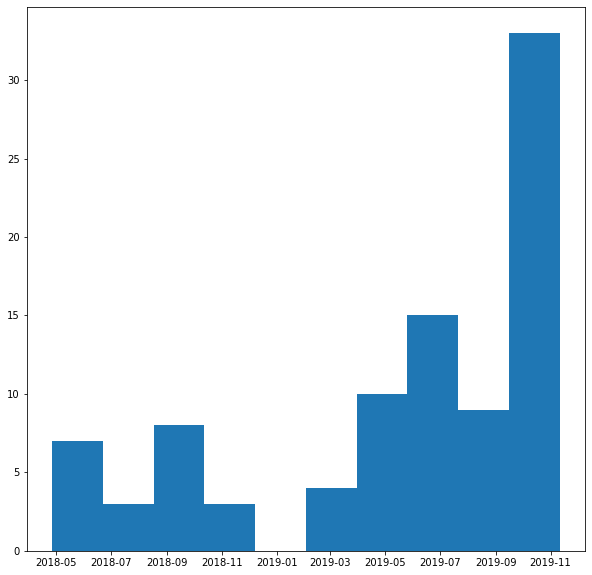

In [15]:
plt.figure(figsize=(10,10))
plt.hist(df_review['review_date'])
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


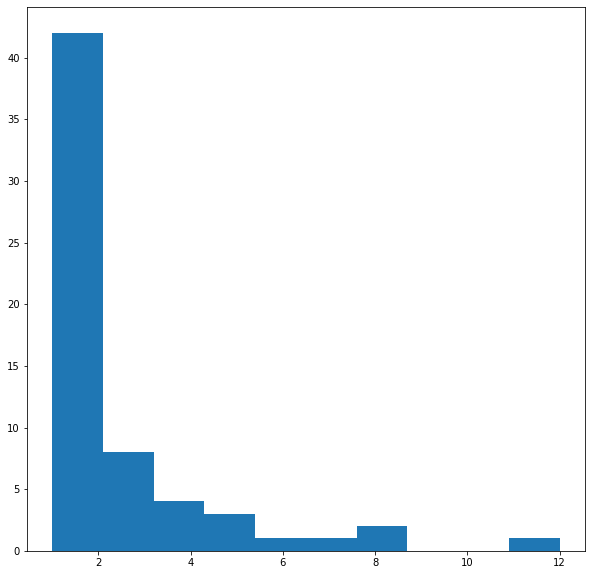

In [16]:
plt.figure(figsize=(10,10))
plt.hist(df_review['helpful_review'])
plt.show()

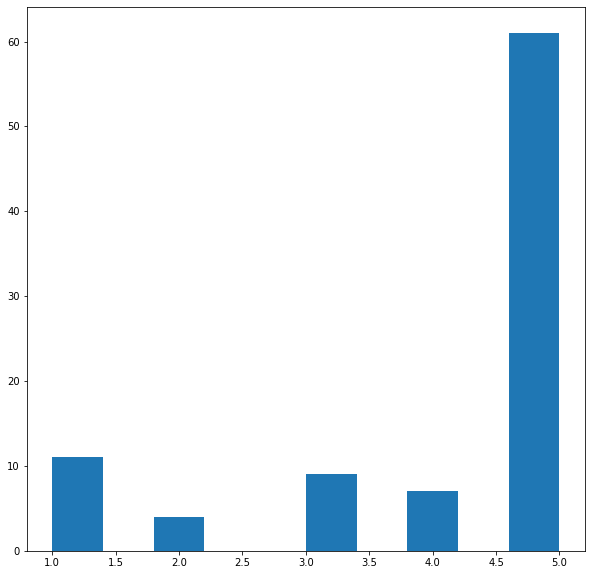

In [17]:
plt.figure(figsize=(10,10))
plt.hist(df_review['stars'])
plt.show()

In [0]:
dates = driver.find_elements(by='xpath',value="//div[@class='LVQB0b']//div[2]//span[@class='p2TkOb']")
person = driver.find_elements(by='xpath',value="//div[@class='LVQB0b']//div[2]//span[@class='X43Kjb']")
all_comms = driver.find_elements(by='xpath',value="//div[@class='LVQB0b']")

In [0]:
dates = driver.find_elements(by='xpath',value="//div[@class='LVQB0b']//div[2]//span[@class='p2TkOb']")
person = driver.find_elements(by='xpath',value="//div[@class='LVQB0b']//div[2]//span[@class='X43Kjb']")
all_comms = driver.find_elements(by='xpath',value="//div[@class='LVQB0b']")


all_responses = []
for i, (d, p, a) in enumerate(zip(dates, person, all_comms)):
  response_info = {}
  response_info.update({'id':i, \
                      'responder_name':p.text, \
                      'response_date':d.text, \
                      'response_text':a.text.split('\n')[1]})
  all_responses.append(response_info)

In [20]:
df_response = pd.DataFrame(all_responses)
df_response['response_date'] = df_response['response_date'].apply(lambda x: pd.datetime.strptime(x, '%B %d, %Y'))
df_response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
id                90 non-null int64
responder_name    90 non-null object
response_date     90 non-null datetime64[ns]
response_text     90 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.9+ KB


In [21]:
df_response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
id                90 non-null int64
responder_name    90 non-null object
response_date     90 non-null datetime64[ns]
response_text     90 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.9+ KB


In [22]:
df_response.head()

,id,responder_name,response_date,response_text
0,0,abillionveg,2019-10-29,"Hi Jared, We apologize for the issue with uplo..."
1,1,abillionveg,2019-10-22,"Dear Ong, Thank you so much for the feedback o..."
2,2,abillionveg,2019-10-22,Hello! Thank you so much for the wonderful rev...
3,3,abillionveg,2019-10-22,Wow thank you for this amazing review Shweta!
4,4,abillionveg,2019-08-21,"Hey Jay, Thanks so much for the review. We hav..."


In [45]:
df_review.loc[:12]

,name,review_date,abridged_review,helpful_review,stars
0,Jared Thresher,2019-10-25,Loving the concept of this app. Even without t...,2.0,4
1,Yoga Ong,2019-10-08,"Overall considered not bad, it is good that ha...",1.0,4
2,eclipse9871,2019-10-16,Love this app especially because it allows use...,4.0,5
3,Shweta Ramanujam,2019-10-14,Been using this app for a while now.Apart from...,8.0,5
4,Jay Laone,2019-08-20,I like the idea! I think it's a little hard to...,NaN,3
5,Theresa Salchert,2019-10-16,"I really love this app. Very easy to use, grea...",NaN,5
6,Jonny Marshall,2019-10-06,Fantastic app. Great resource which is useful ...,NaN,5
7,Hazel Sim,2019-10-16,If you're finding it hard to dine out with fri...,NaN,5
8,Lee Sheng Chua,2019-09-16,Love how this app binds people of same beliefs...,1.0,5
9,Joy Rose,2019-09-26,A great app with a great mission. I've donated...,1.0,5


In [43]:
df_review.loc[14:62]

,name,review_date,abridged_review,helpful_review,stars
14,marisa b,2019-10-07,Great app 👍 it's different from Happy Cow beca...,1.0,5
15,Candy Daitch,2019-10-11,Love this app! Very easy to use and very helpf...,NaN,5
16,Marinette Coertzen,2019-10-01,LOVE this app so much! So many good causes to ...,NaN,5
17,Melanie Martina,2019-09-18,Excellent app! I love that I can help raise fu...,NaN,5
18,Crystal H,2019-10-23,Great app that encourages me to eat more vegan...,NaN,5
19,Riante du Toit,2019-09-16,Easy to use. Great for reviewing vegan product...,NaN,5
20,Lobo Lobo,2019-10-01,Unfortunately it does not have a more up to da...,1.0,1
21,Bushra Amin,2019-10-11,"Clicked ""sign up"" and nothing happened. Tried ...",7.0,1
22,Montse GA,2019-09-18,It's super useful for you and you get to help ...,NaN,5
23,Renèe Allpress,2019-08-16,Desperately needs more subcategories!! How is ...,NaN,3


In [41]:
df_review.loc[64:]

,name,review_date,abridged_review,helpful_review,stars
64,Em Perez,2019-07-27,Downloaded this and theres no vegan or vegetar...,1.0,1
65,Kartik Verma,2019-07-13,I have no idea what the app is about. It's ver...,1.0,1
66,Michał Połaski,2019-05-17,Excellent way to help your chosen sanctuaries!,1.0,4
67,Lin Min Htoo,2019-02-22,Possible Possible today Possible to Possible t...,1.0,5
68,Danielle-Taylor Fleury,2018-11-09,Super cool app#,2.0,5
69,PrX Nation,2019-10-13,Super fun!,NaN,5
70,Paloma Yury,2019-07-15,Es maravillosa la comunidad que se esta constr...,NaN,5
71,Lee Choon Chong,2019-04-20,Hope that this will help me make healthier foo...,3.0,5
72,RJT KMR,2019-05-17,wow,1.0,5
73,Jim Mount,2018-09-06,"A great app, with it's heart in the right plac...",4.0,5


In [62]:
pd.concat([df_review.loc[13],df_review.loc[63]],axis=1).T.reset_index(drop=True)

,name,review_date,abridged_review,helpful_review,stars
0,caiyun Xu,2019-10-31,"It's a useful app. We can share our reviews, e...",NaN,5
1,Sibel Şendere,2019-11-11,I reviewed 10 vegan products and this app dona...,NaN,5


In [59]:
pd.DataFrame(df_review.loc[13])

,13
name,caiyun Xu
review_date,2019-10-31 00:00:00
abridged_review,"It's a useful app. We can share our reviews, e..."
helpful_review,NaN
stars,5


In [0]:
df_review_updated = pd.concat([df_review.loc[:12],\
                               df_review.loc[14:62],\
                               df_review.loc[64:],\
                               pd.concat([df_review.loc[13],\
                                          df_review.loc[63]],\
                                         axis=1).T.reset_index(drop=True)],\
                              axis=0,\
                              ignore_index=True)

In [65]:
df_review_updated.head()


,name,review_date,abridged_review,helpful_review,stars
0,Jared Thresher,2019-10-25,Loving the concept of this app. Even without t...,2,4
1,Yoga Ong,2019-10-08,"Overall considered not bad, it is good that ha...",1,4
2,eclipse9871,2019-10-16,Love this app especially because it allows use...,4,5
3,Shweta Ramanujam,2019-10-14,Been using this app for a while now.Apart from...,8,5
4,Jay Laone,2019-08-20,I like the idea! I think it's a little hard to...,NaN,3


In [66]:
df_review_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 5 columns):
name               92 non-null object
review_date        92 non-null datetime64[ns]
abridged_review    92 non-null object
helpful_review     62 non-null object
stars              92 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 3.7+ KB


In [0]:
df_review_updated['helpful_review'] = pd.to_numeric(df_review_updated['helpful_review'], errors='coerce')
df_review_updated['stars'] = df_review_updated['stars'].astype('int8') 

In [68]:
df_review_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 5 columns):
name               92 non-null object
review_date        92 non-null datetime64[ns]
abridged_review    92 non-null object
helpful_review     62 non-null float64
stars              92 non-null int8
dtypes: datetime64[ns](1), float64(1), int8(1), object(2)
memory usage: 3.1+ KB


In [69]:
df_review_updated.head()

,name,review_date,abridged_review,helpful_review,stars
0,Jared Thresher,2019-10-25,Loving the concept of this app. Even without t...,2.0,4
1,Yoga Ong,2019-10-08,"Overall considered not bad, it is good that ha...",1.0,4
2,eclipse9871,2019-10-16,Love this app especially because it allows use...,4.0,5
3,Shweta Ramanujam,2019-10-14,Been using this app for a while now.Apart from...,8.0,5
4,Jay Laone,2019-08-20,I like the idea! I think it's a little hard to...,NaN,3


In [0]:
df_full = pd.concat([df_review_updated, df_response],axis=1)

In [137]:
df_full.head()

,name,review_date,abridged_review,helpful_review,stars,id,responder_name,response_date,response_text
0,Jared Thresher,2019-10-25,Loving the concept of this app. Even without t...,2.0,4,0.0,abillionveg,2019-10-29,"Hi Jared, We apologize for the issue with uplo..."
1,Yoga Ong,2019-10-08,"Overall considered not bad, it is good that ha...",1.0,4,1.0,abillionveg,2019-10-22,"Dear Ong, Thank you so much for the feedback o..."
2,eclipse9871,2019-10-16,Love this app especially because it allows use...,4.0,5,2.0,abillionveg,2019-10-22,Hello! Thank you so much for the wonderful rev...
3,Shweta Ramanujam,2019-10-14,Been using this app for a while now.Apart from...,8.0,5,3.0,abillionveg,2019-10-22,Wow thank you for this amazing review Shweta!
4,Jay Laone,2019-08-20,I like the idea! I think it's a little hard to...,NaN,3,4.0,abillionveg,2019-08-21,"Hey Jay, Thanks so much for the review. We hav..."


In [138]:
df_full.tail()

,name,review_date,abridged_review,helpful_review,stars,id,responder_name,response_date,response_text
87,Larcielto,2018-07-06,What a fresh idea!,1.0,5,87.0,abillionveg,2018-07-25,Thanks very much Larcielto. How do you like th...
88,Pragnya Roy,2019-05-08,Bill,1.0,5,88.0,abillionveg,2019-05-13,"Thank you Pragnya, grateful to have you on boa..."
89,Rishabh Goyal,2018-05-06,Great app,1.0,5,89.0,abillionveg,2018-07-25,"Thanks very much Rishabh, we just crossed 5,00..."
90,caiyun Xu,2019-10-31,"It's a useful app. We can share our reviews, e...",NaN,5,NaN,NaN,NaT,NaN
91,Sibel Şendere,2019-11-11,I reviewed 10 vegan products and this app dona...,NaN,5,NaN,NaN,NaT,NaN


In [0]:
df_review.to_csv('reviews.csv')
df_response.to_csv('responses.csv')


In [139]:
df_review.query('review_date > "2019-10-30"')

,name,review_date,abridged_review,helpful_review,stars
13,caiyun Xu,2019-10-31,"It's a useful app. We can share our reviews, e...",NaN,5
63,Sibel Şendere,2019-11-11,I reviewed 10 vegan products and this app dona...,NaN,5


In [108]:
import nltk
import string
nltk.download(['stopwords','punkt','wordnet','averaged_perceptron_tagger','vader_lexicon'])
from nltk import word_tokenize, sent_tokenize, pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [0]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    # lower text
    try:
      text = str(text).lower()
    except:
      text = ''.join(re.findall(r"\D",str(text))).lower()


    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [0]:
df_full['clean_reviews'] = df_full['abridged_review'].apply(lambda x: clean_text(x))
df_full['clean_response'] = df_full['response_text'].apply(lambda x: clean_text(x))

In [105]:
df_full.head()

,name,review_date,abridged_review,helpful_review,stars,id,responder_name,response_date,response_text,clean_reviews,clean_response
0,Jared Thresher,2019-10-25,Loving the concept of this app. Even without t...,2.0,4,0.0,abillionveg,2019-10-29,"Hi Jared, We apologize for the issue with uplo...",love concept app even without donation still g...,hi jar apologize issue upload photo due server...
1,Yoga Ong,2019-10-08,"Overall considered not bad, it is good that ha...",1.0,4,1.0,abillionveg,2019-10-22,"Dear Ong, Thank you so much for the feedback o...",overall consider bad good app help vegan veget...,dear ong thank much feedback access folder gal...
2,eclipse9871,2019-10-16,Love this app especially because it allows use...,4.0,5,2.0,abillionveg,2019-10-22,Hello! Thank you so much for the wonderful rev...,love app especially allow user make donation a...,hello thank much wonderful review app many new...
3,Shweta Ramanujam,2019-10-14,Been using this app for a while now.Apart from...,8.0,5,3.0,abillionveg,2019-10-22,Wow thank you for this amazing review Shweta!,use app now.apart look reviews restaurant dish...,wow thank amaze review shweta
4,Jay Laone,2019-08-20,I like the idea! I think it's a little hard to...,NaN,3,4.0,abillionveg,2019-08-21,"Hey Jay, Thanks so much for the review. We hav...",like idea think little hard use find restauran...,hey jay thanks much review long way go excited...


In [142]:
df_full.tail()

,name,review_date,abridged_review,helpful_review,stars,id,responder_name,response_date,response_text,clean_reviews,clean_response
87,Larcielto,2018-07-06,What a fresh idea!,1.0,5,87.0,abillionveg,2018-07-25,Thanks very much Larcielto. How do you like th...,fresh idea,thanks much larcielto like app far
88,Pragnya Roy,2019-05-08,Bill,1.0,5,88.0,abillionveg,2019-05-13,"Thank you Pragnya, grateful to have you on boa...",bill,thank pragnya grateful board work build community
89,Rishabh Goyal,2018-05-06,Great app,1.0,5,89.0,abillionveg,2018-07-25,"Thanks very much Rishabh, we just crossed 5,00...",great app,thanks much rishabh cross reviews country arou...
90,caiyun Xu,2019-10-31,"It's a useful app. We can share our reviews, e...",NaN,5,NaN,NaN,NaT,NaN,useful app share review exchange useful inform...,nan
91,Sibel Şendere,2019-11-11,I reviewed 10 vegan products and this app dona...,NaN,5,NaN,NaN,NaT,NaN,review vegan product app donate one animal san...,nan


In [143]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

df_full.head(20)

,name,review_date,abridged_review,helpful_review,stars,id,responder_name,response_date,response_text,clean_reviews,clean_response
0,Jared Thresher,2019-10-25,Loving the concept of this app. Even without t...,2.0,4,0.0,abillionveg,2019-10-29,"Hi Jared, We apologize for the issue with uplo...",love concept app even without donation still g...,hi jar apologize issue upload photo due server...
1,Yoga Ong,2019-10-08,"Overall considered not bad, it is good that ha...",1.0,4,1.0,abillionveg,2019-10-22,"Dear Ong, Thank you so much for the feedback o...",overall consider bad good app help vegan veget...,dear ong thank much feedback access folder gal...
2,eclipse9871,2019-10-16,Love this app especially because it allows use...,4.0,5,2.0,abillionveg,2019-10-22,Hello! Thank you so much for the wonderful rev...,love app especially allow user make donation a...,hello thank much wonderful review app many new...
3,Shweta Ramanujam,2019-10-14,Been using this app for a while now.Apart from...,8.0,5,3.0,abillionveg,2019-10-22,Wow thank you for this amazing review Shweta!,use app now.apart look reviews restaurant dish...,wow thank amaze review shweta
4,Jay Laone,2019-08-20,I like the idea! I think it's a little hard to...,NaN,3,4.0,abillionveg,2019-08-21,"Hey Jay, Thanks so much for the review. We hav...",like idea think little hard use find restauran...,hey jay thanks much review long way go excited...
5,Theresa Salchert,2019-10-16,"I really love this app. Very easy to use, grea...",NaN,5,5.0,abillionveg,2019-10-22,"Hi Theresa, Thank you so much for the wonderfu...",really love app easy use great see item purcha...,hi theresa thank much wonderful review app man...
6,Jonny Marshall,2019-10-06,Fantastic app. Great resource which is useful ...,NaN,5,6.0,abillionveg,2019-10-22,"Hi Jonny, Thank you so much for posting this n...",fantastic app great resource useful find vegan...,hi jonny thank much posting nice review app ge...
7,Hazel Sim,2019-10-16,If you're finding it hard to dine out with fri...,NaN,5,7.0,abillionveg,2019-10-22,Thanks for the great review Hazel!,find hard dine friend may vegan feel impossibl...,thanks great review hazel
8,Lee Sheng Chua,2019-09-16,Love how this app binds people of same beliefs...,1.0,5,8.0,abillionveg,2019-09-17,"Hi Lee Sheng, thank you so much for taking the...",love app bind people belief also platform anyo...,hi lee sheng thank much take time post review ...
9,Joy Rose,2019-09-26,A great app with a great mission. I've donated...,1.0,5,9.0,abillionveg,2019-10-22,"Dear Joy, It's only because of your contributi...",great app great mission i've donate animal san...,dear joy contribution build community chance m...


In [144]:
df_sentiments = pd.DataFrame(list(df_full['abridged_review'].apply(lambda x: sid.polarity_scores(x))))
df_sentiments.columns=['review_neg','review_neu','review_pos','review_compond']
df_sentiments.head()

,review_neg,review_neu,review_pos,review_compond
0,0.035,0.722,0.244,0.9237
1,0.044,0.729,0.227,0.8845
2,0.000,0.919,0.081,0.6696
3,0.000,0.843,0.157,0.8442
4,0.046,0.722,0.231,0.8997


In [145]:
df_full = pd.concat([df_full, df_sentiments],axis=1)
df_full.head()

,name,review_date,abridged_review,helpful_review,stars,id,responder_name,response_date,response_text,clean_reviews,clean_response,review_neg,review_neu,review_pos,review_compond
0,Jared Thresher,2019-10-25,Loving the concept of this app. Even without t...,2.0,4,0.0,abillionveg,2019-10-29,"Hi Jared, We apologize for the issue with uplo...",love concept app even without donation still g...,hi jar apologize issue upload photo due server...,0.035,0.722,0.244,0.9237
1,Yoga Ong,2019-10-08,"Overall considered not bad, it is good that ha...",1.0,4,1.0,abillionveg,2019-10-22,"Dear Ong, Thank you so much for the feedback o...",overall consider bad good app help vegan veget...,dear ong thank much feedback access folder gal...,0.044,0.729,0.227,0.8845
2,eclipse9871,2019-10-16,Love this app especially because it allows use...,4.0,5,2.0,abillionveg,2019-10-22,Hello! Thank you so much for the wonderful rev...,love app especially allow user make donation a...,hello thank much wonderful review app many new...,0.000,0.919,0.081,0.6696
3,Shweta Ramanujam,2019-10-14,Been using this app for a while now.Apart from...,8.0,5,3.0,abillionveg,2019-10-22,Wow thank you for this amazing review Shweta!,use app now.apart look reviews restaurant dish...,wow thank amaze review shweta,0.000,0.843,0.157,0.8442
4,Jay Laone,2019-08-20,I like the idea! I think it's a little hard to...,NaN,3,4.0,abillionveg,2019-08-21,"Hey Jay, Thanks so much for the review. We hav...",like idea think little hard use find restauran...,hey jay thanks much review long way go excited...,0.046,0.722,0.231,0.8997


In [132]:
df_full.review_compond.mean()
df_full.stars.mean()

4.119565217391305

In [152]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=10)
tfidf_result = tfidf.fit_transform(df_full['clean_reviews']).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df_full.index
tfidf_df.head()

,word_also,word_animal,word_app,word_find,word_food,word_full,word_great,word_help,word_idea,word_love,word_make,word_option,word_product,word_restaurant,word_review,word_sanctuary,word_use,word_vegan
0,0.000000,0.000000,0.257885,0.000000,0.000000,0.470842,0.366978,0.000000,0.537041,0.401880,0.000000,0.000000,0.000000,0.000000,0.356664,0.000000,0.000000,0.000000
1,0.248875,0.000000,0.122428,0.243188,0.200409,0.223527,0.000000,0.243188,0.000000,0.000000,0.497749,0.268536,0.000000,0.000000,0.507965,0.000000,0.000000,0.369823
2,0.295585,0.591171,0.290811,0.000000,0.000000,0.265480,0.000000,0.000000,0.000000,0.226596,0.295585,0.000000,0.000000,0.000000,0.402203,0.328043,0.000000,0.000000
3,0.291952,0.291952,0.430855,0.000000,0.000000,0.262217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.291952,0.279015,0.198630,0.000000,0.570563,0.216918
4,0.000000,0.000000,0.151164,0.600539,0.000000,0.000000,0.000000,0.000000,0.629594,0.000000,0.000000,0.000000,0.000000,0.293674,0.209065,0.000000,0.300269,0.000000


In [153]:
tfidf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 18 columns):
word_also          92 non-null float64
word_animal        92 non-null float64
word_app           92 non-null float64
word_find          92 non-null float64
word_food          92 non-null float64
word_full          92 non-null float64
word_great         92 non-null float64
word_help          92 non-null float64
word_idea          92 non-null float64
word_love          92 non-null float64
word_make          92 non-null float64
word_option        92 non-null float64
word_product       92 non-null float64
word_restaurant    92 non-null float64
word_review        92 non-null float64
word_sanctuary     92 non-null float64
word_use           92 non-null float64
word_vegan         92 non-null float64
dtypes: float64(18)
memory usage: 13.1 KB


In [154]:
df_full = pd.concat([df_full, tfidf_df], axis=1)
df_full.head(10)

,name,review_date,abridged_review,helpful_review,stars,id,responder_name,response_date,response_text,clean_reviews,clean_response,review_neg,review_neu,review_pos,review_compond,word_also,word_animal,word_app,word_find,word_food,word_full,word_great,word_help,word_idea,word_love,word_make,word_option,word_product,word_restaurant,word_review,word_sanctuary,word_use,word_vegan
0,Jared Thresher,2019-10-25,Loving the concept of this app. Even without t...,2.0,4,0.0,abillionveg,2019-10-29,"Hi Jared, We apologize for the issue with uplo...",love concept app even without donation still g...,hi jar apologize issue upload photo due server...,0.035,0.722,0.244,0.9237,0.000000,0.000000,0.257885,0.000000,0.000000,0.470842,0.366978,0.000000,0.537041,0.401880,0.000000,0.000000,0.000000,0.000000,0.356664,0.000000,0.000000,0.000000
1,Yoga Ong,2019-10-08,"Overall considered not bad, it is good that ha...",1.0,4,1.0,abillionveg,2019-10-22,"Dear Ong, Thank you so much for the feedback o...",overall consider bad good app help vegan veget...,dear ong thank much feedback access folder gal...,0.044,0.729,0.227,0.8845,0.248875,0.000000,0.122428,0.243188,0.200409,0.223527,0.000000,0.243188,0.000000,0.000000,0.497749,0.268536,0.000000,0.000000,0.507965,0.000000,0.000000,0.369823
2,eclipse9871,2019-10-16,Love this app especially because it allows use...,4.0,5,2.0,abillionveg,2019-10-22,Hello! Thank you so much for the wonderful rev...,love app especially allow user make donation a...,hello thank much wonderful review app many new...,0.000,0.919,0.081,0.6696,0.295585,0.591171,0.290811,0.000000,0.000000,0.265480,0.000000,0.000000,0.000000,0.226596,0.295585,0.000000,0.000000,0.000000,0.402203,0.328043,0.000000,0.000000
3,Shweta Ramanujam,2019-10-14,Been using this app for a while now.Apart from...,8.0,5,3.0,abillionveg,2019-10-22,Wow thank you for this amazing review Shweta!,use app now.apart look reviews restaurant dish...,wow thank amaze review shweta,0.000,0.843,0.157,0.8442,0.291952,0.291952,0.430855,0.000000,0.000000,0.262217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.291952,0.279015,0.198630,0.000000,0.570563,0.216918
4,Jay Laone,2019-08-20,I like the idea! I think it's a little hard to...,NaN,3,4.0,abillionveg,2019-08-21,"Hey Jay, Thanks so much for the review. We hav...",like idea think little hard use find restauran...,hey jay thanks much review long way go excited...,0.046,0.722,0.231,0.8997,0.000000,0.000000,0.151164,0.600539,0.000000,0.000000,0.000000,0.000000,0.629594,0.000000,0.000000,0.000000,0.000000,0.293674,0.209065,0.000000,0.300269,0.000000
5,Theresa Salchert,2019-10-16,"I really love this app. Very easy to use, grea...",NaN,5,5.0,abillionveg,2019-10-22,"Hi Theresa, Thank you so much for the wonderfu...",really love app easy use great see item purcha...,hi theresa thank much wonderful review app man...,0.082,0.632,0.286,0.8562,0.000000,0.000000,0.262712,0.000000,0.000000,0.000000,0.373848,0.000000,0.000000,0.409404,0.000000,0.000000,0.000000,0.000000,0.000000,0.592692,0.521847,0.000000
6,Jonny Marshall,2019-10-06,Fantastic app. Great resource which is useful ...,NaN,5,6.0,abillionveg,2019-10-22,"Hi Jonny, Thank you so much for posting this n...",fantastic app great resource useful find vegan...,hi jonny thank much posting nice review app ge...,0.000,0.632,0.368,0.9657,0.609792,0.000000,0.149986,0.297930,0.245521,0.000000,0.213435,0.000000,0.312344,0.000000,0.000000,0.328983,0.000000,0.000000,0.000000,0.000000,0.000000,0.453070
7,Hazel Sim,2019-10-16,If you're finding it hard to dine out with fri...,NaN,5,7.0,abillionveg,2019-10-22,Thanks for the great review Hazel!,find hard dine friend may vegan feel impossibl...,thanks great review hazel,0.024,0.922,0.054,0.4019,0.000000,0.334389,0.164494,0.326749,0.269271,0.300332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.455003,0.371108,0.000000,0.496896
8,Lee Sheng Chua,2019-09-16,Love how this app binds people of same beliefs...,1.0,5,8.0,abillionveg,20

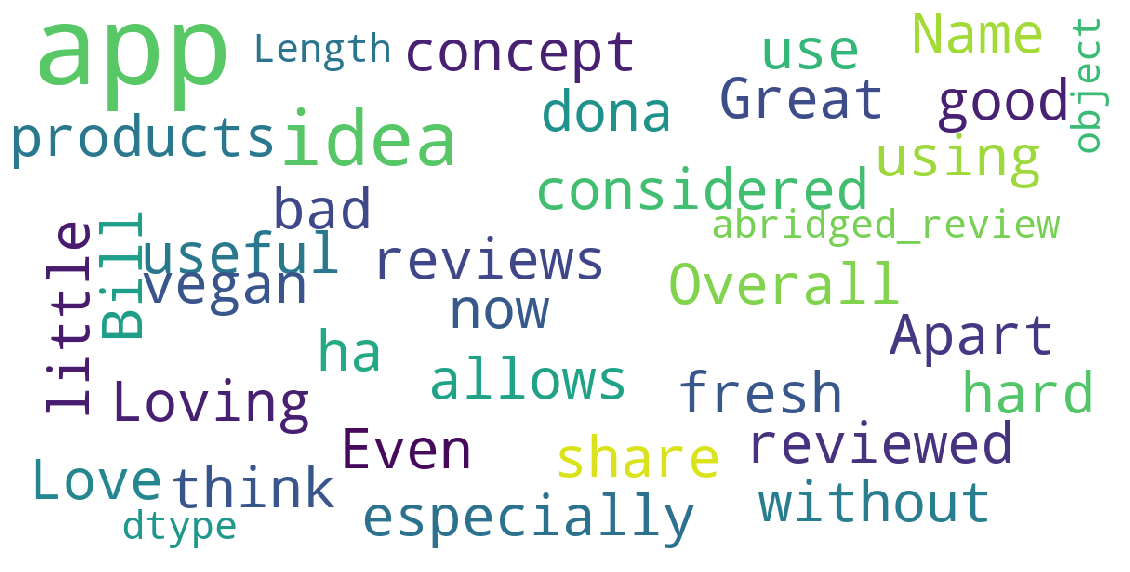

In [155]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df_full['abridged_review'])

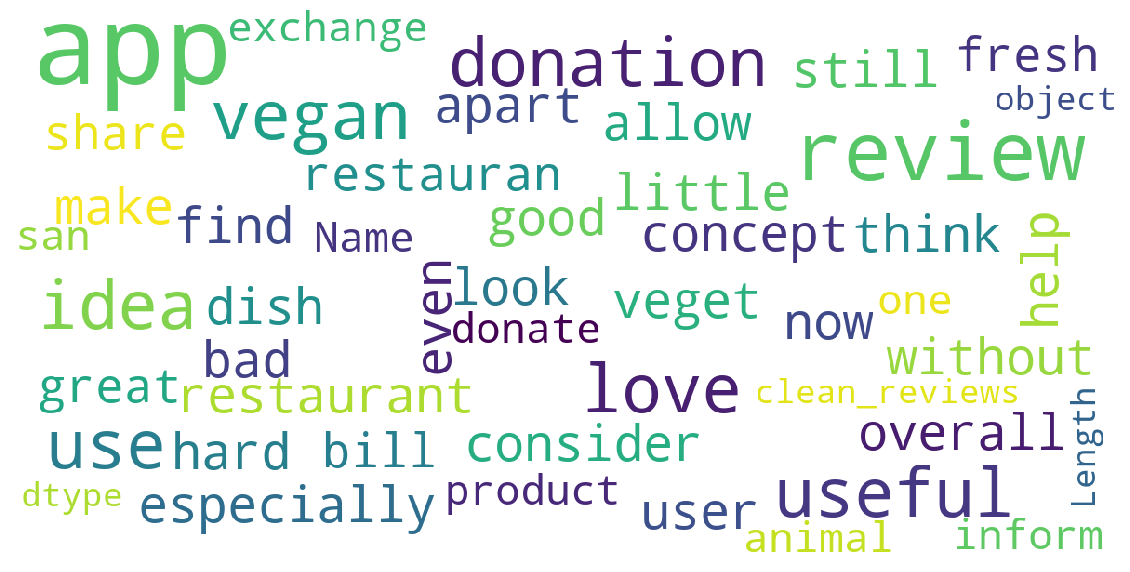

In [156]:
show_wordcloud(df_full['clean_reviews'])